In [41]:

class UnionFind:
    def __init__(self):
        '''\
Create an empty union find data structure.'''
        self.num_weights = {}
        self.parent_pointers = {}
        self.num_to_objects = {}
        self.objects_to_num = {}
        self.__repr__ = self.__str__
    def insert_objects(self, objects):
        '''\
Insert a sequence of objects into the structure.  All must be Python hashable.'''
        for object in objects:
            self.find(object);
    def find(self, object):
        '''\
Find the root of the set that an object is in.
If the object was not known, will make it known, and it becomes its own set.
Object must be Python hashable.'''
        if not object in self.objects_to_num:
            obj_num = len(self.objects_to_num)
            self.num_weights[obj_num] = 1
            self.objects_to_num[object] = obj_num
            self.num_to_objects[obj_num] = object
            self.parent_pointers[obj_num] = obj_num
            return object
        stk = [self.objects_to_num[object]]
        par = self.parent_pointers[stk[-1]]
        while par != stk[-1]:
            stk.append(par)
            par = self.parent_pointers[par]
        for i in stk:
            self.parent_pointers[i] = par
        return self.num_to_objects[par]
    def union(self, object1, object2):
        '''\
Combine the sets that contain the two objects given.
Both objects must be Python hashable.
If either or both objects are unknown, will make them known, and combine them.'''
        o1p = self.find(object1)
        o2p = self.find(object2)
        if o1p != o2p:
            on1 = self.objects_to_num[o1p]
            on2 = self.objects_to_num[o2p]
            w1 = self.num_weights[on1]
            w2 = self.num_weights[on2]
            if w1 < w2:
                o1p, o2p, on1, on2, w1, w2 = o2p, o1p, on2, on1, w2, w1
            self.num_weights[on1] = w1+w2
            del self.num_weights[on2]
            self.parent_pointers[on2] = on1

In [42]:
uf = UnionFind()
uf.insert_objects(['A', 'B', 'C', 'D'])
print("Before union:")
print(uf.parent_pointers)  # Initially, each element is its own parent
uf.union('A', 'B')  # Merge sets containing 'A' and 'B'
print("After union:")
print(uf.parent_pointers)  # 'A' and 'B' should now have the same parent


Before union:
{0: 0, 1: 1, 2: 2, 3: 3}
After union:
{0: 0, 1: 0, 2: 2, 3: 3}


In [43]:
uf = UnionFind()
uf.insert_objects(['X', 'Y', 'Z'])

print("number of connnected components in the structure after BEFORE a union operation", len(set(uf.parent_pointers.values())))

uf.union('X', 'Y')

print("number of connnected components in the structure AFTER doing a union operation", len(set(uf.parent_pointers.values())))

print("the representive of Y is", uf.find('Y'))  # Should print the root of the set containing 'Y', which is 'X'

print("the representive of X is", uf.find('X'))  # Should print the root of the set containing 'Y', which is 'X'



# note that since X and Y are in the same set, the function find returns the same representive element.

number of connnected components in the structure after BEFORE a union operation 3
number of connnected components in the structure AFTER doing a union operation 2
the representive of Y is X
the representive of X is X


In [77]:
def rankedges(G):
    '''\
    Given a graph G, return a list of edges sorted by their weights.'''
    lst=[]
    for e in G.edges():
        if 'weight' in G[e[0]][e[1]]:  
            w = G[e[0]][e[1]]['weight']
            lst.append((e,w))
        else:
            w = 1
            lst.append((e,w))
            
    lst.sort(key=lambda x: x[1])    
    return lst 

def minimal_spanning_tree(G):
    '''\
    Given a graph G, return a minimum spanning tree (as a graph) and a list of ranked edges.'''
    
    tree_ranked_edges=[]
    lst=rankedges(G)

    uf = UnionFind()

    for node in G.nodes():
        uf.find(node)
        tree=nx.Graph()

    for edge in lst:

        if uf.find(edge[0][0])==uf.find(edge[0][1]):
            continue
        else:
            tree_ranked_edges.append(edge)
            uf.union(edge[0][0],edge[0][1])
            tree.add_edge(edge[0][0],edge[0][1], weight=edge[-1] )        
    return tree,tree_ranked_edges

In [78]:
G = nx.Graph()

G.add_edge(0,1, weight=1.2)
G.add_edge(1,2, weight=0.65)
G.add_edge(2,3, weight=0.23)
G.add_edge(3,0, weight=0.15)
G.add_edge(0,5, weight=0.12)
G.add_edge(5,0, weight=0.2)
G.add_edge(0,10, weight=2.3)



In [79]:
tree,_  = minimal_spanning_tree(G)

In [88]:
print("the edges of the tree are ",tree.edges)

#print("number of edges in the tree",len(original_graph_edges))


the edges of the tree are  [(0, 3), (0, 5), (0, 10), (3, 2), (2, 1)]


# Euclidea Minimal Spanning tree

The `euclidean_minimal_spanning_tree` function offers a robust solution for constructing a minimal spanning tree over a set of points in Euclidean space. Leveraging the power of NetworkX and NumPy libraries, this function efficiently computes the Euclidean distances between all pairs of points, facilitating the creation of a complete graph representation. Subsequently, the function applies Prim's algorithm, implemented through the `spanningtree` function, to extract the minimal spanning tree from the computed distances. This algorithm ensures that the resultant tree connects all points in the graph while minimizing the total edge weight, providing an optimal solution for various applications such as network design, clustering, and facility location.

By encapsulating the complexities of distance computation and spanning tree construction within a single function, users can seamlessly integrate this functionality into their workflows. Whether analyzing spatial datasets, optimizing transportation networks, or designing sensor layouts, the `euclidean_minimal_spanning_tree` function serves as a versatile tool for efficiently extracting the fundamental structure inherent within Euclidean point clouds. Its intuitive interface, backed by robust algorithms and libraries, empowers users to explore and exploit the underlying connectivity patterns within their data, fostering insights and enabling informed decision-making in diverse domains.

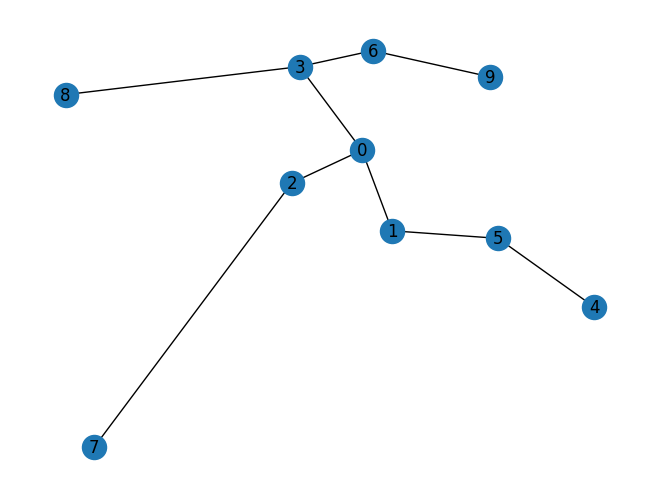

In [89]:
import numpy as np
import networkx as nx

def euclidean_distance(point1, point2):
    '''\
    Calculate the Euclidean distance between two points.'''
    return np.linalg.norm(point1 - point2)

def euclidean_minimal_spanning_tree(points):
    '''\
    Find the Euclidean minimal spanning tree for the given points using Prim's algorithm.'''
    
    # Create a complete graph using NetworkX
    G = nx.Graph()
    
    # Add nodes to the graph
    for i, point in enumerate(points):
        G.add_node(i, pos=point)
    
    # Compute distances and add edges to the graph
    n = len(points)
    for i in range(n):
        for j in range(i+1, n):
            distance = euclidean_distance(points[i], points[j])
            G.add_edge(i, j, weight=distance)
    
    # Find the minimal spanning tree using the spanningtree function
    minimal_tree, _ = minimal_spanning_tree(G)
    
    return minimal_tree

# Example usage:
# Generate random points
np.random.seed(0)  # for reproducibility
points = np.random.rand(10, 2)  # 10 points in 2D space
# Find the Euclidean minimal spanning tree
minimal_tree = euclidean_minimal_spanning_tree(points)
# Visualize the minimal spanning tree
nx.draw(minimal_tree, pos={i: point for i, point in enumerate(points)}, with_labels=True)

In [118]:
def hierarchical_clustering(points, num_clusters):
    '''\
    Perform hierarchical clustering on the given points to obtain the specified number of clusters.'''
    
    # Obtain the Euclidean minimal spanning tree
    minimal_tree = euclidean_minimal_spanning_tree(points)
    
    # Initialize the number of clusters and cluster IDs
    num_clusters_remaining = 1
    cluster_ids = {i: 0 for i in range(len(points))}
    
    
    # Iterate until the desired number of clusters is reached
    while num_clusters_remaining < num_clusters:
        # Find the longest edge in the minimal spanning tree
        longest_edge = max(minimal_tree.edges(data=True), key=lambda x: x[2]['weight'])
        
        # Remove the longest edge from the minimal spanning tree
        minimal_tree.remove_edge(*longest_edge[:2])
        
        # Update cluster membership
        cluster_ids[longest_edge[0]] = num_clusters_remaining
        cluster_ids[longest_edge[1]] = num_clusters_remaining
        
        # Merge clusters
        
        # Increment the number of clusters remaining
        num_clusters_remaining += 1
    
    connected_components = list(nx.connected_components(minimal_tree))
    point_clusters = []
    for cluster in connected_components:
        c = []
        for i in cluster:
            c.append(points[i])
        point_clusters.append(c)    

    return point_clusters, connected_components ,minimal_tree

# Example usage:
# Generate random points
np.random.seed(0)  # for reproducibility
points = np.random.rand(10, 2)  # 10 points in 2D space
# Perform hierarchical clustering to obtain 3 clusters
point_clusters, cluster_ids,minimal_tree_deleted_edges = hierarchical_clustering(points, num_clusters=2)
print("Point Clusters:", point_clusters)
print("Cluster IDs:", cluster_ids)


Point Clusters: [[array([0.5488135 , 0.71518937]), array([0.60276338, 0.54488318]), array([0.4236548 , 0.64589411]), array([0.43758721, 0.891773  ]), array([0.96366276, 0.38344152]), array([0.79172504, 0.52889492]), array([0.56804456, 0.92559664]), array([0.0202184 , 0.83261985]), array([0.77815675, 0.87001215])], [array([0.07103606, 0.0871293 ])]]
Cluster IDs: [{0, 1, 2, 3, 4, 5, 6, 8, 9}, {7}]


Point Clusters: [[array([0.28280696, 0.12019656]), array([0.2961402 , 0.11872772]), array([0.07103606, 0.0871293 ]), array([0.21038256, 0.1289263 ]), array([0.20887676, 0.16130952]), array([0.15896958, 0.11037514])], [array([0.5488135 , 0.71518937]), array([0.60276338, 0.54488318]), array([0.4236548 , 0.64589411]), array([0.43758721, 0.891773  ]), array([0.96366276, 0.38344152]), array([0.79172504, 0.52889492]), array([0.56804456, 0.92559664]), array([0.97861834, 0.79915856]), array([0.46147936, 0.78052918]), array([0.11827443, 0.63992102]), array([0.52184832, 0.41466194]), array([0.26455561, 0.77423369]), array([0.45615033, 0.56843395]), array([0.0187898, 0.6176355]), array([0.61209572, 0.616934  ]), array([0.94374808, 0.6818203 ]), array([0.3595079 , 0.43703195]), array([0.6976312 , 0.06022547]), array([0.66676672, 0.67063787]), array([0.31542835, 0.36371077]), array([0.57019677, 0.43860151]), array([0.98837384, 0.10204481]), array([0.65310833, 0.2532916 ]), array([0.46631077, 0.2444

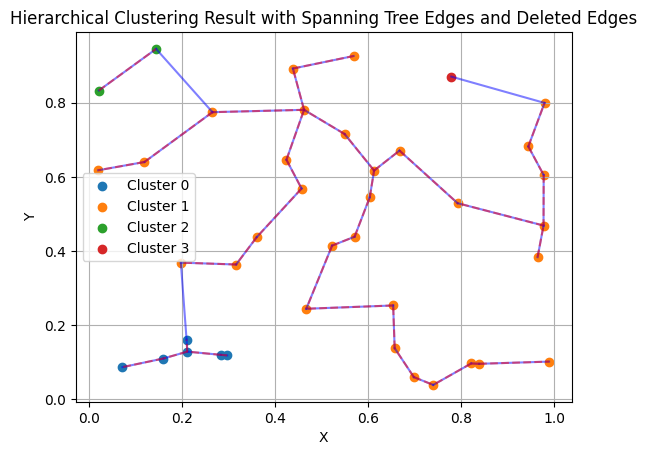

In [129]:
import matplotlib.pyplot as plt
import numpy as np

def plot_clusters_with_edges_and_deleted_edges(points, point_clusters, minimal_tree, minimal_tree_deleted_edges):
    '''\
    Plot the points with different colors representing different clusters, 
    and show the edges of the minimal spanning tree and the deleted edges.'''
    
    # Plot each cluster
    for cluster_id, cluster_points in enumerate(point_clusters):
        cluster_points = np.array(cluster_points)
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}')
    
    # Plot edges of the minimal spanning tree
    for edge in minimal_tree.edges():
        p1 = points[edge[0]]
        p2 = points[edge[1]]
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], color='blue', alpha=0.5)
    
    # Plot deleted edges
    for edge in minimal_tree_deleted_edges.edges():
        p1 = points[edge[0]]
        p2 = points[edge[1]]
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], color='red', linestyle='--', alpha=0.5)
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Hierarchical Clustering Result with Spanning Tree Edges and Deleted Edges')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# Generate random points
np.random.seed(0)  # for reproducibility
points = np.random.rand(40, 2)  # 10 points in 2D space
# Perform hierarchical clustering to obtain 2 clusters
point_clusters, cluster_ids, minimal_tree_deleted_edges = hierarchical_clustering(points, num_clusters=4)
print("Point Clusters:", point_clusters)
print("Cluster IDs:", cluster_ids)

# Generate the minimal spanning tree
minimal_tree = euclidean_minimal_spanning_tree(points)

# Plot the points with different colors representing different clusters,
# and show the edges of the minimal spanning tree and the deleted edges
plot_clusters_with_edges_and_deleted_edges(points, point_clusters, minimal_tree, minimal_tree_deleted_edges)
